In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import transformers
from transformers import BertTokenizerFast, RobertaTokenizerFast, TFEncoderDecoderModel, AdamWeightDecay
from sklearn.model_selection import train_test_split



print('transformers version:', transformers.__version__)
print('tensorflow version:', tf.__version__)

2023-02-09 15:13:28.878807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 15:13:28.879951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 15:13:28.880640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 15:13:28.882572: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

transformers version: 4.20.1
tensorflow version: 2.6.4


In [3]:
df = pd.read_csv('cnn_dailymail/data.csv')
df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [4]:
train_df = df.iloc[:40000, :]

In [6]:
train_df

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
39995,70dacadfa64681c2fe1a0c23589d788391c5b6ad,"By . Sarah Griffiths . PUBLISHED: . 07:41 EST,...",Mountain hares live in the Scottish Highlands ...
39996,70dbbd7b74e881df74db36c56d23f0e3c38a095a,"A unique diamond ring worth at least $577,000 ...",The pink argyle and white diamond band is wort...
39997,70dbfeea4828bdf4721cfb7f1a2a723957837cb9,By . Daily Mail Reporter . PUBLISHED: . 12:39 ...,Boy was waiting to go home sick when police sa...
39998,70dd659ba6fff566432e01e8934de1939b567cc9,By . Laura Clark . Pupils are not learning to ...,Teachers are ‘playing safe’ and setting work t...


In [8]:
train_df['text_len'] = train_df['article'].apply(lambda x: len(x.split()))
train_df['summary_len'] = train_df['highlights'].apply(lambda x: len(x.split()))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
train_df.head()

,id,article,highlights,text_len,summary_len
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67


Text(0.5, 1.0, 'Histogram of length of tokenized summary')

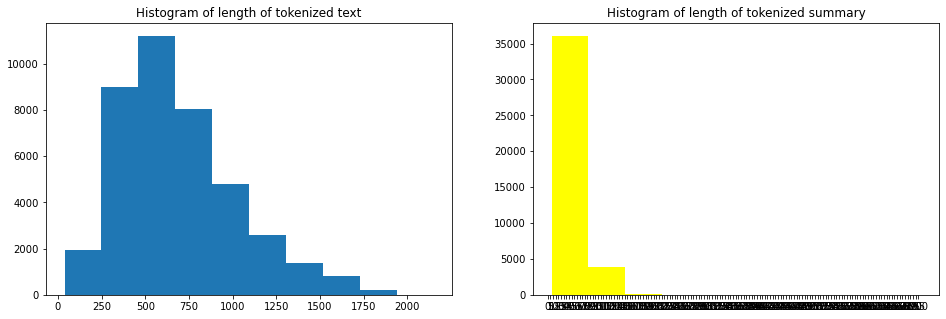

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
ax[0].hist(train_df['text_len'])
ax[0].set_xticks(np.arange(0, max(train_df['text_len'])+1,250))
ax[0].set_title('Histogram of length of tokenized text')
ax[1].hist(train_df['summary_len'], color='yellow')
ax[1].set_xticks(np.arange(0, max(train_df['summary_len'])+1,5))
ax[1].set_title('Histogram of length of tokenized summary')


In [21]:
# Configure the training parameters
class TrainingConfig:
    val_split = 0.2
    pretrained_checkpoint = 'bert-base-uncased'
    encoder_checkpoint = 'bert-base-uncased'
    decoder_checkpoint = 'bert-base-uncased'
    pad_token_id = 0
    shared_weight = False
    encoder_max_len = 256 
    decoder_max_len = 100 
    nb_epoch = 10 
    learning_rate = 3e-5 
    batch_size = 8 
    

In [22]:
# load the train and validation dataset
class DataLoader:
    def __init__(self, paragraphs, summaries, **kwargs):
        self.paragraphs = paragraphs 
        self.summaries = summaries 
        self.tokenizer = kwargs.get('tokenizer')
        self.val_split = kwargs.get('val_split')
        self.encoder_max_len = kwargs.get('encoder_max_len')
        self.decoder_max_len = kwargs.get('decoder_max_len')
    
    @property
    def sample_size(self):
        assert len(self.paragraphs)==len(self.summaries)
        return len(self.paragraphs)
    
    def split_train_test(self):
        train_idx, val_idx = train_test_split(
            list(range(self.sample_size)), 
            test_size=self.val_split, 
            random_state=98
        )
        return train_idx, val_idx

    def convert_text_to_ids(self, input_paragraphs, input_summaries):
        inputs = self.tokenizer(
            list(input_paragraphs), 
            return_tensors='np', 
            padding='max_length', 
            truncation=True, 
            max_length=self.encoder_max_len
        )
        outputs = self.tokenizer(
            list(input_summaries), 
            return_tensors='np', 
            padding='max_length', 
            truncation=True, 
            max_length=self.decoder_max_len
        )
        return inputs, outputs

    def list_to_tensor_dataset(self, input_paragraphs, input_summaries):
        inputs, outputs = self.convert_text_to_ids(
            input_paragraphs, 
            input_summaries
        )
        input_ids = tf.data.Dataset.from_tensor_slices(
            inputs['input_ids']
        )
        attention_masks = tf.data.Dataset.from_tensor_slices(
            inputs['attention_mask']
        )
        output_ids = tf.data.Dataset.from_tensor_slices(
            outputs['input_ids']
        )
        output_attention_masks = tf.data.Dataset.from_tensor_slices(
            outputs['attention_mask']
        )                                                
        tf_dataset = tf.data.Dataset.zip(
            ({
                'input_ids': input_ids, 
                'attention_mask': attention_masks,
                'decoder_input_ids': output_ids, 
                'decoder_attention_mask': output_attention_masks
            }, 
            output_ids)
        )
        return tf_dataset
    
    def __call__(self):
        train_idx, val_idx = self.split_train_test()
        train_paras, val_paras = self.paragraphs[train_idx], self.paragraphs[val_idx]
        train_sums, val_sums = self.summaries[train_idx], self.summaries[val_idx]
        train_dataset = self.list_to_tensor_dataset(train_paras, train_sums)
        val_dataset = self.list_to_tensor_dataset(val_paras, val_sums)
        return train_dataset, val_dataset

In [24]:
class Trainer:
    def __init__(self, model, loss_fn, optimizer, metric):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.metric = metric
        # loss tracker will capture the mean of loss till now
        self.loss_tracker = tf.keras.metrics.Mean(name='mean_loss')
    
    # Training Step
    @tf.function 
    def train_step(self, inputs):
        input_seqs, input_labels = inputs
        with tf.GradientTape() as tape: 
            outputs = self.model(
                input_seqs['input_ids'],
                input_seqs['attention_mask'],
                input_seqs['decoder_input_ids'],
                input_seqs['decoder_attention_mask'],
                training = True
            )
            logits = outputs.logits
            loss = self.loss_fn(input_labels, logits)
        gradients = tape.gradient(loss, self.model.trainable_weights)
        self.optimizer.apply_gradients(
            zip(gradients, self.model.trainable_weights)
        )
        self.loss_tracker.update_state(loss)
        #self.metric.update_state(y, predictions)
        return loss
        
    # Validation Step
    @tf.function  
    def val_step(self, inputs):
        input_seqs, input_labels = inputs
        outputs = self.model(                
                input_seqs['input_ids'],
                input_seqs['attention_mask'],
                input_seqs['decoder_input_ids'],
                input_seqs['decoder_attention_mask'],
                training = False
        )
        logits = outputs.logits
        loss = self.loss_fn(input_labels, logits)
        self.loss_tracker.update_state(loss)
        #self.metric.update_state(y,predictions)
        return loss

In [25]:
def batched_generate_summary(model, tokenizer, batched_input):
    input_seqs, input_labels = batched_input
    outputs = model.generate(
        input_ids=input_seqs['input_ids'], 
        attention_mask=input_seqs['attention_mask']
    )
    output_strs = tokenizer.batch_decode(
        outputs, 
        skip_special_tokens=True
    )
    output_gold = tokenizer.batch_decode(
        input_seqs['decoder_input_ids'], 
        skip_special_tokens=True
    )
    input_strs = tokenizer.batch_decode(
        input_seqs['input_ids'], 
        skip_special_tokens=True
    )
    return output_strs, output_gold, input_strs

In [27]:
reviews = train_df['article'].values
summaries = train_df['highlights'].values

training_config = TrainingConfig(nb_epoch=10)
tokenizer = BertTokenizerFast.from_pretrained(training_config.encoder_checkpoint)

dataloader_args = {
    'tokenizer': tokenizer,
    'val_split': training_config.val_split,
    'encoder_max_len': training_config.encoder_max_len,
    'decoder_max_len': training_config.decoder_max_len
}
dataloader = DataLoader(reviews, summaries, **dataloader_args)
train_dataset, val_dataset = dataloader()
train_dataset = (train_dataset
                 .shuffle(int(dataloader.sample_size*(1-training_config.val_split)))
                 .batch(training_config.batch_size))
val_dataset = val_dataset.batch(training_config.batch_size)

In [28]:
bert2bert = TFEncoderDecoderModel.from_encoder_decoder_pretrained(
    training_config.encoder_checkpoint, 
    training_config.decoder_checkpoint,
    # whether to share the encoder weight
    tie_encoder_decoder=training_config.shared_weight
)

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
All model checkpoint layers were used when initializing TFBertLMHeadModel.

Some layers of TFBertLMHeadModel were not initialized from the model checkpoint at bert

In [29]:
bert2bert.save_pretrained('bert2bert')
bert2bert = TFEncoderDecoderModel.from_pretrained('bert2bert')

All model checkpoint layers were used when initializing TFEncoderDecoderModel.

All the layers of TFEncoderDecoderModel were initialized from the model checkpoint at bert2bert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFEncoderDecoderModel for predictions without further training.


In [32]:

bert2bert.config.decoder_start_token_id = tokenizer.cls_token_id 
bert2bert.config.eos_token_id = tokenizer.sep_token_id
bert2bert.config.pad_token_id = tokenizer.pad_token_id 
bert2bert.config.vocab_size = bert2bert.config.encoder.vocab_size 


bert2bert.config.max_length = 30
bert2bert.config.min_length = 3
bert2bert.config.no_repeat_ngram_size = 2
bert2bert.config.early_stopping = True
bert2bert.config.length_penalty = 2.0
bert2bert.config.num_beams = 4

In [33]:
rouge = datasets.load_metric('rouge')
tf.keras.backend.clear_session()
trainer = Trainer(model=bert2bert,
                  loss_fn=Seq2SeqLoss(training_config.pad_token_id),
                  optimizer=AdamWeightDecay(
                      learning_rate=training_config.learning_rate, 
                      weight_decay_rate=0.005
                  ),
                  metric=None)


In [34]:
# Training Loop
for epoch in range(training_config.nb_epoch):
    print(f'\nEpoch {epoch+1}\n')
    print('Training....')
    for step,batched_input in enumerate(tqdm(train_dataset)):
        loss = trainer.train_step(batched_input)
        till_now_loss = trainer.loss_tracker.result()
        if step%200 == 0:
            print(f'Training loss for one batch at step {step}: {round(till_now_loss,3)}') 
    trainer.loss_tracker.reset_states()
    
    print('Validating....')
    val_measures = {'rouge precision':0, 'rouge recall':0, 'rouge f1': 0}
    for step, batched_input in enumerate(tqdm(val_dataset)):
        val_loss = trainer.val_step(batched_input)
    till_now_val_loss = trainer.loss_tracker.result()
    print(f'Validation loss: {round(till_now_val_loss,3)}')
    bert2bert.save_pretrained(
        f'bert2bert-Checkpoint-epoch{epoch+1}-loss{round(till_now_val_loss,3)}'
    )
#     for name, value in val_measures.items():
#         print(f'Validation {name}: {value}')
    trainer.loss_tracker.reset_states()


Epoch 1

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

2023-02-09 15:25:24.692079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Training loss for one batch at step 0: 10.10099983215332
Training loss for one batch at step 200: 6.258999824523926
Training loss for one batch at step 400: 5.7179999351501465
Training loss for one batch at step 600: 5.4629998207092285
Training loss for one batch at step 800: 5.298999786376953
Training loss for one batch at step 1000: 5.184000015258789
Training loss for one batch at step 1200: 5.09499979019165
Training loss for one batch at step 1400: 5.0289998054504395
Training loss for one batch at step 1600: 4.9710001945495605
Training loss for one batch at step 1800: 4.919000148773193
Training loss for one batch at step 2000: 4.872000217437744
Training loss for one batch at step 2200: 4.830999851226807
Training loss for one batch at step 2400: 4.793000221252441
Training loss for one batch at step 2600: 4.758999824523926
Training loss for one batch at step 2800: 4.728000164031982
Training loss for one batch at step 3000: 4.699999809265137
Training loss for one batch at step 3200: 4.

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.989000082015991

Epoch 2

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 3.744999885559082
Training loss for one batch at step 200: 3.8529999256134033
Training loss for one batch at step 400: 3.8469998836517334
Training loss for one batch at step 600: 3.8380000591278076
Training loss for one batch at step 800: 3.8310000896453857
Training loss for one batch at step 1000: 3.8239998817443848
Training loss for one batch at step 1200: 3.818000078201294
Training loss for one batch at step 1400: 3.806999921798706
Training loss for one batch at step 1600: 3.799999952316284
Training loss for one batch at step 1800: 3.7929999828338623
Training loss for one batch at step 2000: 3.7809998989105225
Training loss for one batch at step 2200: 3.7739999294281006
Training loss for one batch at step 2400: 3.7669999599456787
Training loss for one batch at step 2600: 3.759000062942505
Training loss for one batch at step 2800: 3.749000072479248
Training loss for one batch at step 3000: 3.740000009536743
Training loss for one batch at step 32

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.572000026702881

Epoch 3

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 3.453000068664551
Training loss for one batch at step 200: 3.2090001106262207
Training loss for one batch at step 400: 3.2090001106262207
Training loss for one batch at step 600: 3.2109999656677246
Training loss for one batch at step 800: 3.2009999752044678
Training loss for one batch at step 1000: 3.1989998817443848
Training loss for one batch at step 1200: 3.2009999752044678
Training loss for one batch at step 1400: 3.2019999027252197
Training loss for one batch at step 1600: 3.203000068664551
Training loss for one batch at step 1800: 3.2039999961853027
Training loss for one batch at step 2000: 3.2009999752044678
Training loss for one batch at step 2200: 3.200000047683716
Training loss for one batch at step 2400: 3.197000026702881
Training loss for one batch at step 2600: 3.194999933242798
Training loss for one batch at step 2800: 3.191999912261963
Training loss for one batch at step 3000: 3.190000057220459
Training loss for one batch at step 32

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.3389999866485596

Epoch 4

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 2.934000015258789
Training loss for one batch at step 200: 2.7279999256134033
Training loss for one batch at step 400: 2.742000102996826
Training loss for one batch at step 600: 2.74399995803833
Training loss for one batch at step 800: 2.747999906539917
Training loss for one batch at step 1000: 2.755000114440918
Training loss for one batch at step 1200: 2.759999990463257
Training loss for one batch at step 1400: 2.759999990463257
Training loss for one batch at step 1600: 2.759999990463257
Training loss for one batch at step 1800: 2.760999917984009
Training loss for one batch at step 2000: 2.760999917984009
Training loss for one batch at step 2200: 2.760999917984009
Training loss for one batch at step 2400: 2.76200008392334
Training loss for one batch at step 2600: 2.763000011444092
Training loss for one batch at step 2800: 2.7639999389648438
Training loss for one batch at step 3000: 2.7660000324249268
Training loss for one batch at step 3200: 2.76

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.2249999046325684

Epoch 5

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 2.4690001010894775
Training loss for one batch at step 200: 2.382999897003174
Training loss for one batch at step 400: 2.3889999389648438
Training loss for one batch at step 600: 2.3910000324249268
Training loss for one batch at step 800: 2.3980000019073486
Training loss for one batch at step 1000: 2.4010000228881836
Training loss for one batch at step 1200: 2.4030001163482666
Training loss for one batch at step 1400: 2.4079999923706055
Training loss for one batch at step 1600: 2.4110000133514404
Training loss for one batch at step 1800: 2.4170000553131104
Training loss for one batch at step 2000: 2.4230000972747803
Training loss for one batch at step 2200: 2.427000045776367
Training loss for one batch at step 2400: 2.430000066757202
Training loss for one batch at step 2600: 2.433000087738037
Training loss for one batch at step 2800: 2.436000108718872
Training loss for one batch at step 3000: 2.437000036239624
Training loss for one batch at step 3

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.2100000381469727

Epoch 6

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 1.902999997138977
Training loss for one batch at step 200: 2.13700008392334
Training loss for one batch at step 400: 2.11899995803833
Training loss for one batch at step 600: 2.121000051498413
Training loss for one batch at step 800: 2.127000093460083
Training loss for one batch at step 1000: 2.131999969482422
Training loss for one batch at step 1200: 2.134000062942505
Training loss for one batch at step 1400: 2.134999990463257
Training loss for one batch at step 1600: 2.138000011444092
Training loss for one batch at step 1800: 2.1429998874664307
Training loss for one batch at step 2000: 2.1449999809265137
Training loss for one batch at step 2200: 2.1480000019073486
Training loss for one batch at step 2400: 2.1519999504089355
Training loss for one batch at step 2600: 2.1530001163482666
Training loss for one batch at step 2800: 2.1570000648498535
Training loss for one batch at step 3000: 2.1600000858306885
Training loss for one batch at step 3200: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.2330000400543213

Epoch 7

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 1.7940000295639038
Training loss for one batch at step 200: 1.8509999513626099
Training loss for one batch at step 400: 1.8630000352859497
Training loss for one batch at step 600: 1.8669999837875366
Training loss for one batch at step 800: 1.8700000047683716
Training loss for one batch at step 1000: 1.8730000257492065
Training loss for one batch at step 1200: 1.878000020980835
Training loss for one batch at step 1400: 1.8830000162124634
Training loss for one batch at step 1600: 1.8890000581741333
Training loss for one batch at step 1800: 1.8930000066757202
Training loss for one batch at step 2000: 1.8990000486373901
Training loss for one batch at step 2200: 1.902999997138977
Training loss for one batch at step 2400: 1.909000039100647
Training loss for one batch at step 2600: 1.9119999408721924
Training loss for one batch at step 2800: 1.9149999618530273
Training loss for one batch at step 3000: 1.9179999828338623
Training loss for one batch at ste

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.2730000019073486

Epoch 8

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 1.7760000228881836
Training loss for one batch at step 200: 1.6399999856948853
Training loss for one batch at step 400: 1.6440000534057617
Training loss for one batch at step 600: 1.6519999504089355
Training loss for one batch at step 800: 1.659000039100647
Training loss for one batch at step 1000: 1.6619999408721924
Training loss for one batch at step 1200: 1.6660000085830688
Training loss for one batch at step 1400: 1.6749999523162842
Training loss for one batch at step 1600: 1.6790000200271606
Training loss for one batch at step 1800: 1.6829999685287476
Training loss for one batch at step 2000: 1.684999942779541
Training loss for one batch at step 2200: 1.690000057220459
Training loss for one batch at step 2400: 1.6950000524520874
Training loss for one batch at step 2600: 1.6990000009536743
Training loss for one batch at step 2800: 1.7020000219345093
Training loss for one batch at step 3000: 1.7070000171661377
Training loss for one batch at ste

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.3510000705718994

Epoch 9

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 1.6009999513626099
Training loss for one batch at step 200: 1.4600000381469727
Training loss for one batch at step 400: 1.4600000381469727
Training loss for one batch at step 600: 1.4620000123977661
Training loss for one batch at step 800: 1.468999981880188
Training loss for one batch at step 1000: 1.4739999771118164
Training loss for one batch at step 1200: 1.4789999723434448
Training loss for one batch at step 1400: 1.4800000190734863
Training loss for one batch at step 1600: 1.4859999418258667
Training loss for one batch at step 1800: 1.4880000352859497
Training loss for one batch at step 2000: 1.4930000305175781
Training loss for one batch at step 2200: 1.4980000257492065
Training loss for one batch at step 2400: 1.5019999742507935
Training loss for one batch at step 2600: 1.50600004196167
Training loss for one batch at step 2800: 1.5089999437332153
Training loss for one batch at step 3000: 1.5140000581741333
Training loss for one batch at ste

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.4200000762939453

Epoch 10

Training....


  0%|          | 0/4000 [00:00<?, ?it/s]

Training loss for one batch at step 0: 1.5049999952316284
Training loss for one batch at step 200: 1.2799999713897705
Training loss for one batch at step 400: 1.277999997138977
Training loss for one batch at step 600: 1.281000018119812
Training loss for one batch at step 800: 1.2869999408721924
Training loss for one batch at step 1000: 1.2940000295639038
Training loss for one batch at step 1200: 1.2970000505447388
Training loss for one batch at step 1400: 1.3020000457763672
Training loss for one batch at step 1600: 1.3079999685287476
Training loss for one batch at step 1800: 1.309999942779541
Training loss for one batch at step 2000: 1.3140000104904175
Training loss for one batch at step 2200: 1.3170000314712524
Training loss for one batch at step 2400: 1.3209999799728394
Training loss for one batch at step 2600: 1.3250000476837158
Training loss for one batch at step 2800: 1.3279999494552612
Training loss for one batch at step 3000: 1.3309999704360962
Training loss for one batch at ste

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation loss: 3.5239999294281006


In [43]:
from transformers import BertTokenizerFast, EncoderDecoderModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained('Bert_model')
model = EncoderDecoderModel.from_pretrained('Bert_model').to(device)

In [44]:
def generate_summary(text):
    # cut off at BERT max length 512
    inputs = tokenizer([text], padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    input_ids = inputs.input_ids.to(device)
    attention_mask = inputs.attention_mask.to(device)
    output = model.generate(input_ids, attention_mask=attention_mask)
    return tokenizer.decode(output[0], skip_special_tokens=True)

In [47]:
text = val_dataset['article'][0]
target_output = val_dataset['highlights'][0]
predicted = generate_summary(text)

In [86]:
from rouge import Rouge
rouge = Rouge()    
rouge.get_scores(predicted,target_output, avg=True)

{'rouge-1': {'r': 0.425531914893617, 'p': 0.4, 'f': 0.41237112902540124},
 'rouge-2': {'r': 0.2982456140350877,
  'p': 0.2982456140350877,
  'f': 0.29824560903508773},
 'rouge-l': {'r': 0.425531914893617, 'p': 0.4, 'f': 0.41237112902540124}}